In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import keras
from keras import models, layers
import tensorflow as tf
from sklearn.metrics import confusion_matrix

np.set_printoptions(suppress=True)
data_df = pd.read_csv('https://raw.githubusercontent.com/personal-research/MAXI-J1535/main/data/processed/interim.csv')

In [4]:
data_df = data_df.sample(frac=1) # shuffle the dataframe

def normalize(x):
    x = (x-min(x))/(max(x)-min(x))
    return x

# X

arr_names =  ['hardness', 'tins', 'disk_norm', 'gammas', 'nthcomp_norms', 'intensities']
(hardness, tins, disk_norms, gammas, nthcomp_norms, intensities) = (normalize(np.array(data_df[arr_name])) for arr_name in arr_names)

# Y
num_qpos = np.array(data_df['num_qpos']).reshape(len(data_df), 1)
## Stack x values
x_vals = np.array([], dtype=np.int64).reshape(0,6)

for a, b, c, d, e, f in zip(hardness, tins, disk_norms, gammas, nthcomp_norms, intensities): 
    new_arr = np.array([float(a), float(b), float(c), float(d), float(e), float(f)])
    x_vals = np.vstack([x_vals, new_arr])

# Train test split
X_train, X_test, y_train, y_test = train_test_split(x_vals, num_qpos, test_size=0.1)

In [5]:
def get_model():
    model = models.Sequential()
    model.add(layers.Dense(10, activation='relu')) # fix this line
    model.add(layers.Dense(10, activation='relu')) 
    model.add(layers.Dense(4, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) # sparse may be wrong

    return model

In [6]:
model = get_model()
epochs = 2000
history = model.fit(X_train, y_train, validation_split = 0.1, epochs=epochs, batch_size=25, verbose=0)

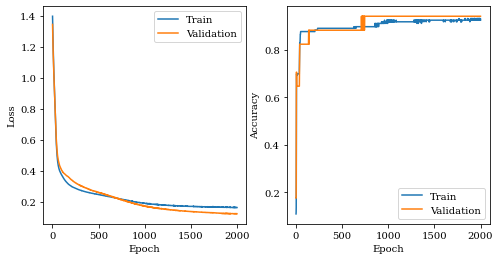

In [9]:
#Evaluate model
hist = history.history
epochs_arr = np.array(range(1, epochs+1))

train_loss = hist['loss']
val_loss = hist['val_loss']

train_acc = hist['accuracy']
val_acc = hist['val_accuracy']

# Make plot
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
plt.rcParams['font.family']='serif'

axs[0].plot(epochs_arr, train_loss, label='Train')
axs[0].plot(epochs_arr, val_loss, label='Validation')
axs[0].set(xlabel='Epoch', ylabel='Loss')
axs[0].legend()

axs[1].plot(epochs_arr, train_acc, label='Train')
axs[1].plot(epochs_arr, val_acc, label='Validation')
axs[1].set(xlabel='Epoch', ylabel='Accuracy')
axs[1].legend()

plt.show()

In [52]:
model = get_model()
epochs = 600
history = model.fit(X_train, y_train, validation_split = 0.1, epochs=epochs, batch_size=25, verbose=0)
results = model.evaluate(X_test, y_test)

predictions = model.predict(X_test)

y_pred = np.array([]).astype(int)

labels = [0, 1, 2, 3]

for row in predictions: 
    idx = np.argmax(row)
    y_pred = np.append(y_pred, labels[idx])

print(y_pred)
print(results)

1/1 [==============================] - 0s 16ms/step - loss: 0.3420 - accuracy: 0.7895
[0 0 0 0 0 2 0 0 0 2 0 0 2 2 0 0 0 0 0]
[0.34201672673225403, 0.7894737124443054]


## Make plots

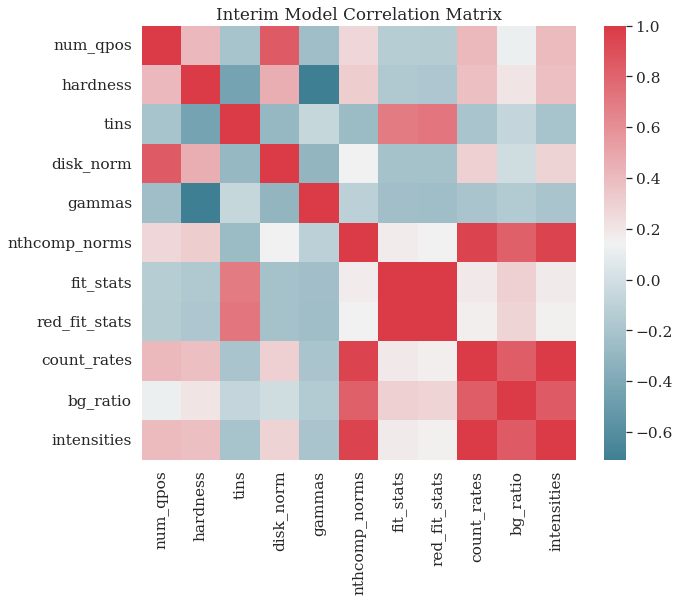

In [56]:
# Correlation matrix

fig, ax = plt.subplots(figsize=(10, 8))
corr = corr_df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

plt.title('Interim Model Correlation Matrix')
plt.show()

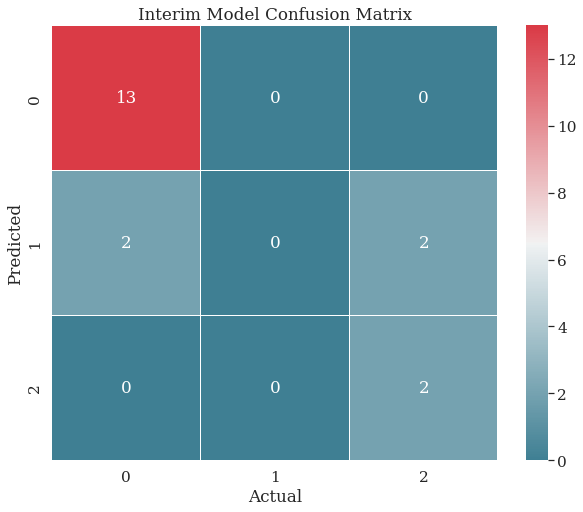

In [57]:
# Confusion matrix

fig, ax = plt.subplots(figsize=(10, 8))
plt.rcParams['font.family']='serif'

cm = confusion_matrix(y_test.flatten(), y_pred)
sns.heatmap(cm, annot=True, cmap=sns.diverging_palette(220, 10, as_cmap=True), linewidths=.5)
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.title('Interim Model Confusion Matrix')
plt.show()

